[0 0]: -0.15329167469586163 -> 0
[0 1]: 0.7029569676939804 -> 1
[1 0]: 0.06222401797727162 -> 1
[1 1]: 0.9184726603671136 -> 1


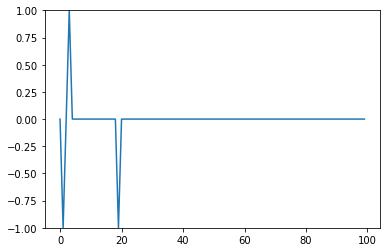

In [44]:
# This is a Jupyter version of the Python code found on the blog : https://blog.dbrgn.ch
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# Programming a Perceptron in Python

# from random import choice
from numpy import array, dot, random

from pylab import plot, ylim


# Then let's create the step function. In reference to Mathematica, I'll call this function unit_step
unit_step = lambda x: 0 if x < 0 else 1

# Next we need to map the possible input to the expected output. 
# The first two entries of the NumPy array in each tuple are the two input values. 0,0 ->(array([0,0,1]), 0)
# The second element of the tuple is the expected result. 0 -> (array([0,0,1]), 0)
# And the third entry of the array is a "dummy" input (also called the bias) which is needed to move 
# the threshold (also known as the decision boundary) up or down as needed by the step function. 1 -> (array([0,0,1]), 0)
# Its value is always 1, so that its influence on the result can be controlled by its weight.
# As you can see, this training sequence maps exactly to the definition of the OR function:

training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

# Next we'll choose three random numbers between 0 and 1 as the initial weights:
w = random.rand(3)

# Now on to some variable initializations. 
# The errors list is only used to store the error values so that they can be plotted later on. 
# If you don't want to do any plotting, you can just leave it away. 
# The eta variable controls the learning rate. And n specifies the number of learning iterations.

# n order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. 
# In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input 
# data much larger numbers should be used.

errors = []
eta = 0.2
n = 100

# First we get a random input set from the training data. 
# Then we calculate the dot product (sometimes also called scalar product or inner product) of the input 
# and weight vectors. This is our (scalar) result, which we can compare to the expected value. 
# If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. 
# This correction factor is calculated in the last line, where the error is multiplied with the 
# learning rate (eta) and the input vector (x). It is then added to the weights vector, 
# in order to improve the results in the next iteration.


for i in range(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x
    

# And that's already everything we need in order to train the perceptron! 
# It has now "learned" to act like a logical OR function:

for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))
    
ylim([-1,1])
plot(errors)